<a href="https://colab.research.google.com/github/jimbounce/DeepLearningCourse/blob/main/Notebooks/Chap10/10_1_1D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.1: 1D Convolution**

This notebook investigates 1D convolutional layers.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a signal that we can apply convolution to
x = [5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1]

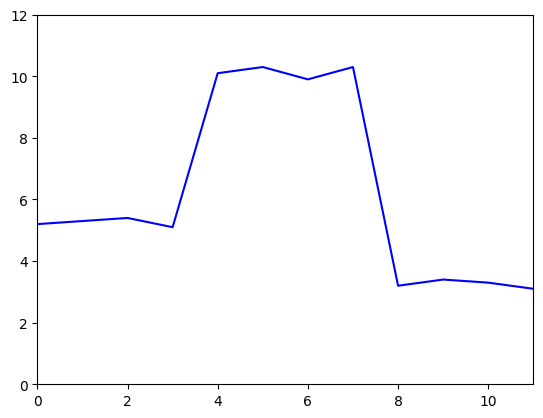

In [4]:
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'b-')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
plt.show()

In [23]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 1
# as in figure 10.2a-c.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures


def conv_3_1_1_zp(x_in, omega):
  # Set the padding size
  padding = 1

  # Create a padded input array

  # The "[0] *" initialises all the values to zeros
  x_padded = [0] * (len(x_in) + (2 * padding))
  print("x_padded_initialised = ", x_padded)
  for i, x in enumerate(x_in): # The enumerate() function is used to obtain both the index i and the value x of each element in x_in.
    x_padded[i + padding] = x
    print(i, x, x_padded)
  # Perform the convolution
  x_out = [0] * len(x_in)
  for i in range(len(x_in)):
    for j in range(len(omega)):
      x_out[i] += omega[j] * x_padded[i+j]
      print("")
      print("i",i)
      print("j",j)
      print("x_out[i]",x_out[i])
      print("omega[j]",omega[j])
      print("x_padded[i+j]",x_padded[i+j])
      print("x_out", x_out)

  return x_out

Now let's see what kind of things convolution can do
First, it can average nearby values, smoothing the function:

In [ ]:

omega = [0.33,0.33,0.33]
h = conv_3_1_1_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h):3.3}, should be 71.1")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

Notice how the red function is a smoothed version of the black one as it has averaged adjacent values.  The first and last outputs are considerably lower than the original curve though.  Make sure that you understand why!<br><br>

With different weights, the convolution can be used to find sharp changes in the function:

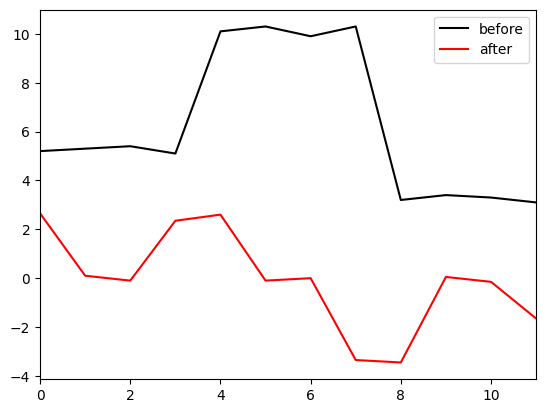

In [35]:

omega = [-0.5,0,0.5]
h2 = conv_3_1_1_zp(x, omega)

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h2, 'r-',label='after')
ax.set_xlim(0,11)
# ax.set_ylim(0, 12)
ax.legend()
plt.show()

Notice that the convolution has a peak where the original function went up and trough where it went down.  It is roughly zero where the function is locally flat.  This convolution approximates a derivative. <br> <br>

Now let's define the convolutions from figure 10.3.  

In [55]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 2, and a dilation of 1
# as in figure 10.3a-b.  Write it yourself, don't call a library routine!
# stride = 2 means skips every other output value

def conv_3_2_1_zp(x_in, omega):
  # Set the padding size
  padding = 1

  # Create a padded input array
  # The "[0] *" initialises all the values to zeros
  x_padded = [0] * (len(x_in) + (2 * padding))
  print("x_padded", x_padded, len(x_in))

  for i, x in enumerate(x_in): # The enumerate() function is used to obtain both the index i and the value x of each element in x_in.
    x_padded[i + padding] = x
    print(i, x, x_padded)

  # Perform the convolution
  x_out = [0] * (int(1+ len(x_in)*0.5)) # list of correct length but with all zeros
  print("x_out", x_out)
  print("len(x_out)", len(x_out), "len(x_padded)", len(x_padded))
  for i in range(int(0.5*len(x_in))):
    for j in range(len(omega)):
      x_out[i] += omega[j] * x_padded[(2*i) + j] # deleted skipping one x-padded value at a time (as well as counting up in j's)
      print("")
      print("i",i)
      print("j",j)
      print("x_out[i]",x_out[i])
      print("omega[j]",omega[j])
      print("x_padded[i+j]",x_padded[i+j])
      print("x_out", x_out)

  return x_out

In [ ]:
omega = [0.33,0.33,0.33]
h3 = conv_3_2_1_zp(x, omega)

# If you have done this right, the output length should be six and it should
# contain every other value from the original convolution which had stride 1
print("\n", "original conv", h)
print("this conv", h3)

In [60]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 5, a stride of 1, and a dilation of 1
# as in figure 10.3c.  Write it yourself, don't call a library routine!
def conv_5_1_1_zp(x_in, omega):
    # Set the padding size
  padding = 1

  # Create a padded input array
  # The "[0] *" initialises all the values to zeros
  x_padded = [0] * (len(x_in) + (2 * padding))
  print("x_padded", x_padded, len(x_in))

  for i, x in enumerate(x_in): # The enumerate() function is used to obtain both the index i and the value x of each element in x_in.
    x_padded[i + padding] = x
    print(i, x, x_padded)

  # Perform the convolution
  x_out = [0] * (len(x_in)) # list of correct length but with all zeros
  print("x_out", x_out)
  print("len(x_out)", len(x_out), "len(x_padded)", len(x_padded))
  for i in range(len(x_in)):
    for j in range(len(omega)):
      x_out[i] += omega[j] * x_padded[i + j] # deleted skipping one x-padded value at a time (as well as counting up in j's)
      print("")
      print("i",i)
      print("j",j)
      print("x_out[i]",x_out[i])
      print("omega[j]",omega[j])
      print("x_padded[i+j]",x_padded[i+j])
      print("x_out", x_out)

  return x_out

In [61]:

omega2 = [0.2, 0.2, 0.2, 0.2, 0.2]
h4 = conv_5_1_1_zp(x, omega2)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h4):3.3}, should be 69.6")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h4, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

x_padded [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 12
0 5.2 [0, 5.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 5.3 [0, 5.2, 5.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 5.4 [0, 5.2, 5.3, 5.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 5.1 [0, 5.2, 5.3, 5.4, 5.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 10.1 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 0, 0, 0, 0, 0, 0, 0, 0]
5 10.3 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 0, 0, 0, 0, 0, 0, 0]
6 9.9 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 0, 0, 0, 0, 0, 0]
7 10.3 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 0, 0, 0, 0, 0]
8 3.2 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 0, 0, 0, 0]
9 3.4 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 0, 0, 0]
10 3.3 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 0, 0]
11 3.1 [0, 5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1, 0]
x_out [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(x_out) 12 len(x_padded) 14

i 0
j 0
x_out[i] 0.0
omega[j] 0.2
x_padded[i+j] 0
x_out [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

i 0
j

IndexError: ignored

In [ ]:
# Finally let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 2
# as in figure 10.3d.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_2_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    x_out = x_out


    return x_out

In [ ]:
omega = [0.33,0.33,0.33]
h5 = conv_3_1_2_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h5):3.3}, should be 68.3")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h5, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

Finally, let's investigate representing convolutions as full matrices, and show we get the same answer.

In [ ]:
# Compute matrix in figure 10.4 d
def get_conv_mat_3_1_1_zp(n_out, omega):
  omega_mat = np.zeros((n_out,n_out))
  # TODO Fill in this matix
  # Replace this line:
  omega_mat = omega_mat



  return omega_mat

In [ ]:
# Run original convolution
omega = np.array([-1.0,0.5,-0.2])
h6 = conv_3_1_1_zp(x, omega)
print(h6)

# If you have done this right, you should get the same answer
omega_mat = get_conv_mat_3_1_1_zp(len(x), omega)
h7 = np.matmul(omega_mat, x)
print(h7)


TODO:  What do you expect to happen if we apply the last convolution twice?  Can this be represented as a single convolution?  If so, then what is it?